In [2]:
from dataset.dataset import MultiModalDataset
import PIL
import matplotlib.pyplot as plt
from mmaction.datasets import build_dataset
import torch

/home/sadat/miniconda3/envs/dataloader/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sadat/miniconda3/envs/dataloader/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [7]:
def imshow(tensor, idx=0):
    plt.imshow(tensor.permute(1, 2, 3, 0)[idx])

## Multimodal Dataset

In [4]:
train_dataset = MultiModalDataset(ann_file='../../../data/wlasl/train_annotations.txt',
                                  root_dir='../../../data/wlasl/rawframes',
                                  clip_len=32,
                                  resolution=224,
                                  transforms=None,
                                  frame_interval=1,
                                  num_clips=1
                                  )

In [5]:
dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=1,
                                                shuffle=False,
                                                num_workers=2,
                                                pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


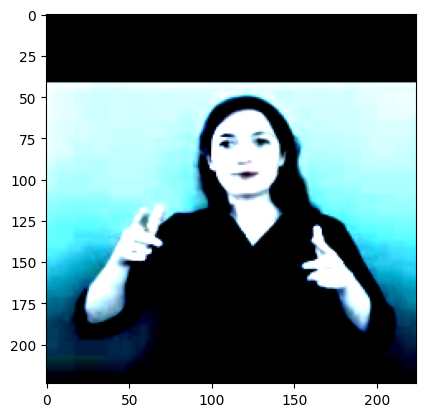

In [49]:
iter_ = iter(dataloader)
batch = next(iter_)
imshow(batch[0][0])

## MMCV Dataset

In [10]:
# Set up dataset
train_cfg = dict(
    type='RawframeDataset',
    ann_file='../../../data/wlasl/train_annotations.txt',
    data_prefix='../../../data/wlasl/rawframes',
    pipeline=[
        dict(
            type='SampleFrames',
            clip_len=32,
            frame_interval=2,
            num_clips=1),
        dict(type='RawFrameDecode'),
        dict(type='Resize', scale=(-1, 256)),
        dict(type='RandomResizedCrop', area_range=(0.4, 1.0)),
        dict(type='Resize', scale=(224, 224), keep_ratio=False),
        dict(type='Flip', flip_ratio=0.5),
        dict(
            type='Normalize',
            mean=[123.675, 116.28, 103.53],
            std=[58.395, 57.12, 57.375],
            to_bgr=False),
        dict(type='FormatShape', input_format='NCTHW'),
        dict(type='Collect', keys=['imgs', 'label'], meta_keys=[]),
        dict(type='ToTensor', keys=['imgs', 'label'])
    ])
mmcv_dataset = build_dataset(train_cfg)

mmcv_train_loader = torch.utils.data.DataLoader(dataset=mmcv_dataset,
                                                batch_size=1,
                                                shuffle=False,
                                                num_workers=2,
                                                pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


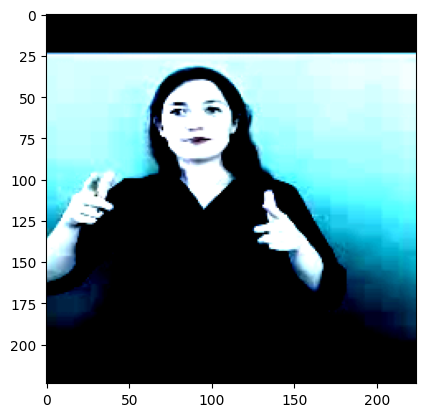

In [39]:
img_iter = iter(mmcv_train_loader)
x = next(img_iter)
mmcv_imgs = x['imgs']
imshow(mmcv_imgs.squeeze(), 0)